In [1]:
# Loading all needed packages at the start
import elastix 
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk

## Fill in your own paths in the cell below ##

In [2]:
ELASTIX_PATH=r"C:\Users\20181758\Documents\master\Q3\8DM20\elastix-5.0.0-win64\elastix"
TRANSFORMIX_PATH=r"C:\Users\20181758\Documents\master\Q3\8DM20\elastix-5.0.0-win64\transformix"
# to Elastix.exe hiaha
#ELASTIX_PATH = r'C:/Users/20183303/Documents/Jaar 5 - ME/Q3/CS in medische beeldanalyse/Elastix files/Elastix.exe'
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)
# to Transformix.exe
#TRANSFORMIX_PATH = r'C:/Users/20183303/Documents/Jaar 5 - ME/Q3/CS in medische beeldanalyse/Elastix files/Transformix.exe'
# to TrainingData
filepath_data = r'C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData'


### Load patient data and inspect

In [15]:
patient_nrs_list = ['p102','p107', 'p108', 'p109', 'p115', 'p116', 'p117', 
                    'p119', 'p120', 'p125', 'p127','p128', 'p129', 'p133', 'p135']
patient_nr = patient_nrs_list[10] #pick any index up to 14 for that patient
file_p_mr = filepath_data+ '\{}\mr_bffe.mhd'.format(patient_nr)  # example of patient 102 input MR image
file_p_mask = filepath_data+'\{}\prostaat.mhd'.format(patient_nr) # example of patient 102 segmentation mask

# Convert so images can be inspected
readable_mr = imageio.imread(file_p_mr)
readable_mask = imageio.imread(file_p_mask)

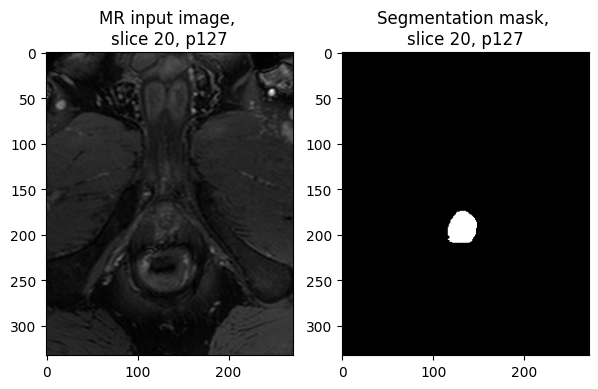

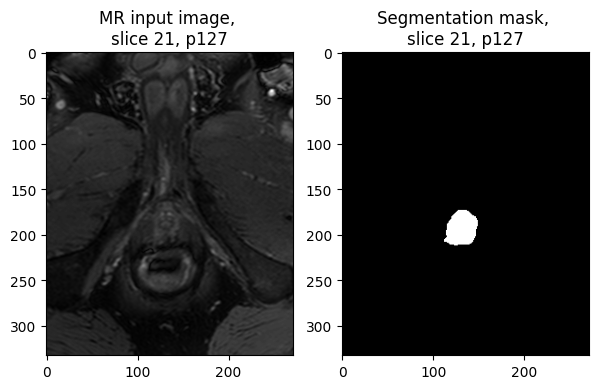

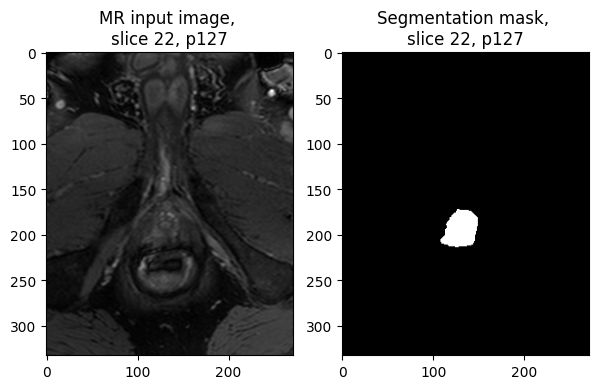

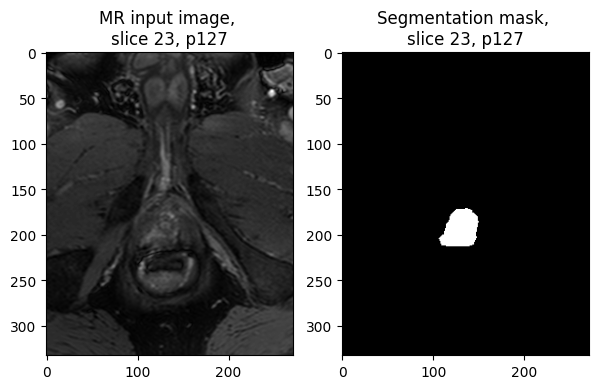

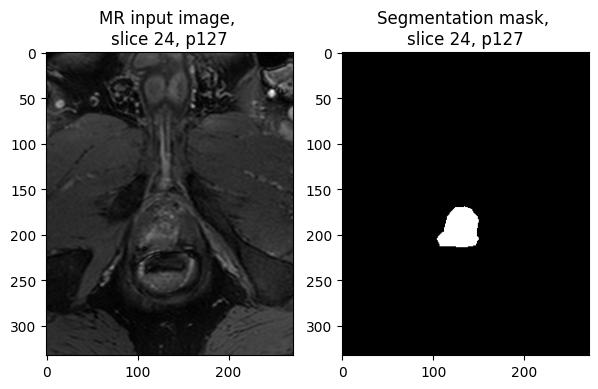

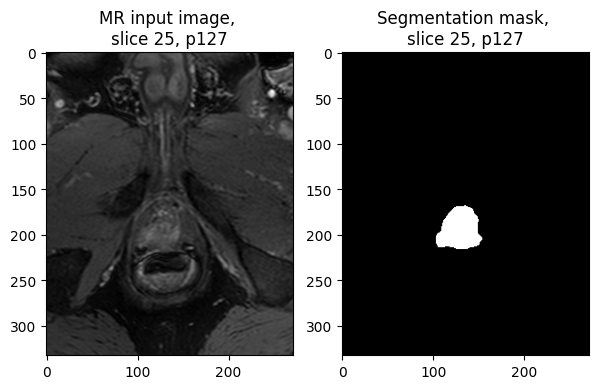

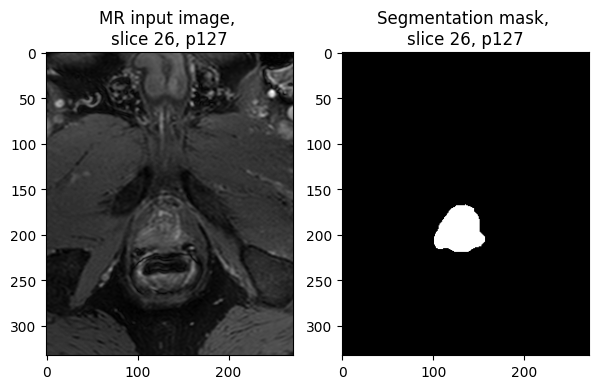

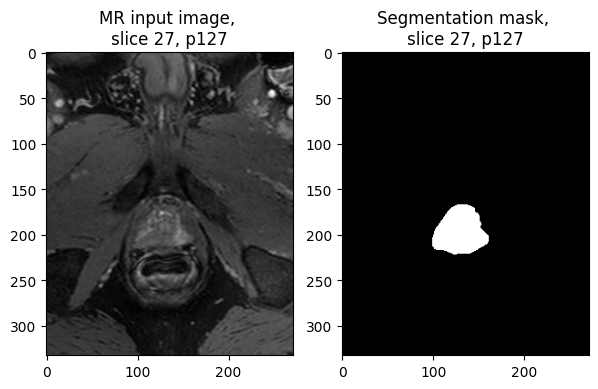

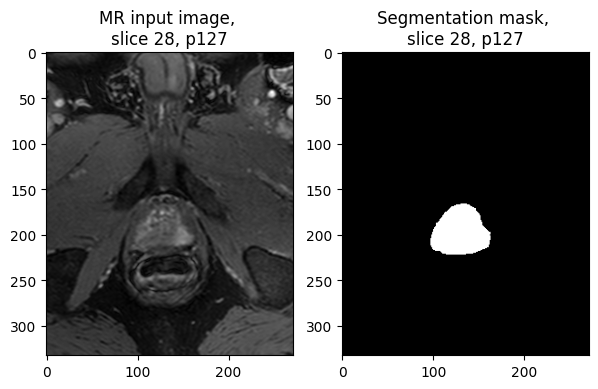

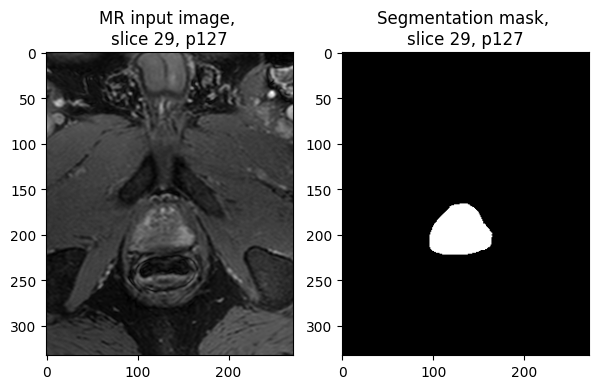

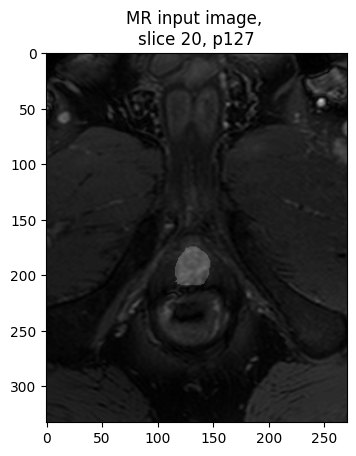

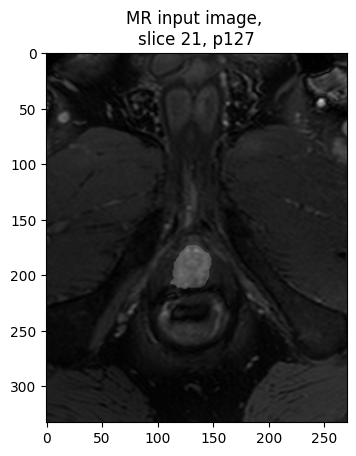

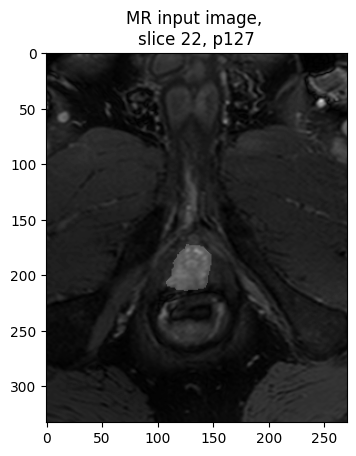

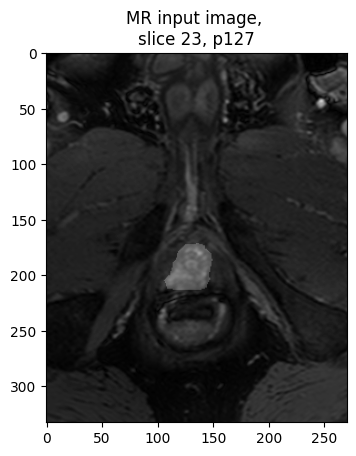

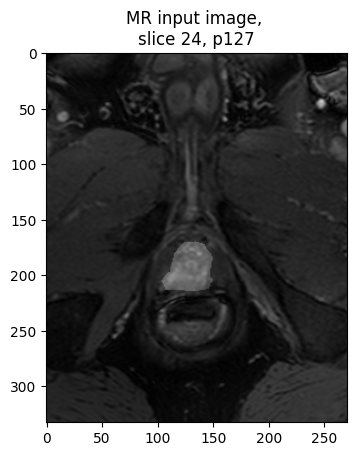

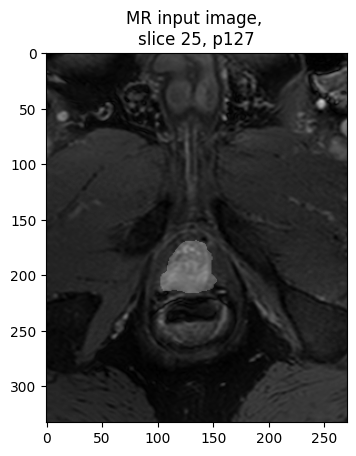

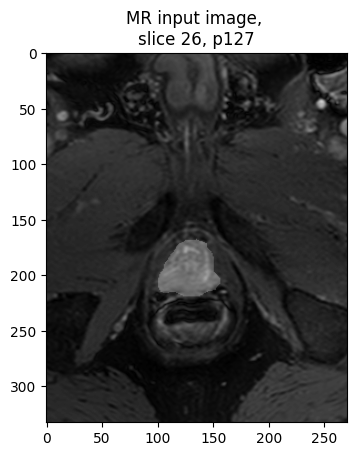

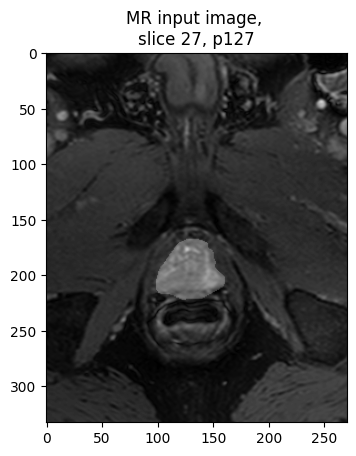

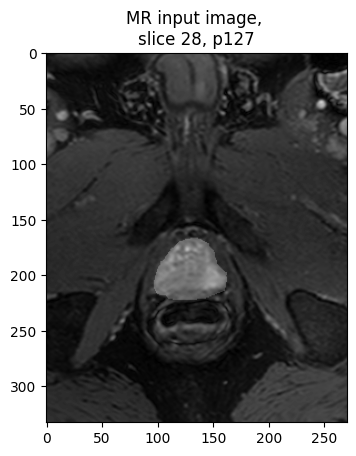

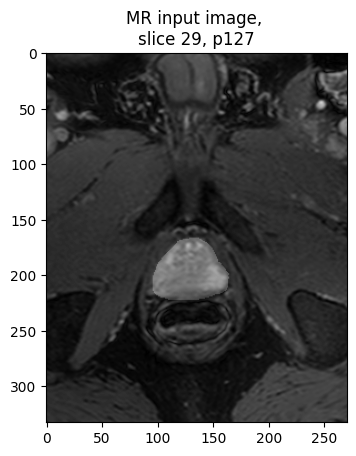

In [24]:
for i in range(20,30):
    plt.imshow(readable_mr[i,:,:], cmap='gray') 
    plt.imshow(readable_mask[i,:,:], cmap="gray",alpha =0.2) 
    
    plt.title('MR input image, \nslice {}, {}'.format(i, patient_nr))
    plt.show()

In [17]:
## Try out some transformation with elastix, bspline multires parameters file

In [11]:
parameter_file_path_experiment = os.path.join(filepath_data,'parameters_bspline_multires_MR.txt')
output_file_path_experiment = os.path.join(filepath_data,'results')

fixed_image_path = filepath_data+'\p107\mr_bffe.mhd'
moving_image_path = filepath_data+'\p102\mr_bffe.mhd'

print(parameter_file_path_experiment)

print(output_file_path_experiment)

C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\parameters_bspline_multires_MR.txt
C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\results


In [12]:

el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[parameter_file_path_experiment],
    output_dir=output_file_path_experiment)

C:\Users\20181758\Documents\master\Q3\8DM20\elastix-5.0.0-win64\elastix -f C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p107\mr_bffe.mhd -m C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p102\mr_bffe.mhd -p C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\parameters_bspline_multires_MR.txt -out C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\results


In [13]:
itk_image_fixed = sitk.ReadImage(fixed_image_path)
image_array_fixed = sitk.GetArrayFromImage(itk_image_fixed)
itk_image_moving = sitk.ReadImage(moving_image_path)
image_array_moving = sitk.GetArrayFromImage(itk_image_moving)

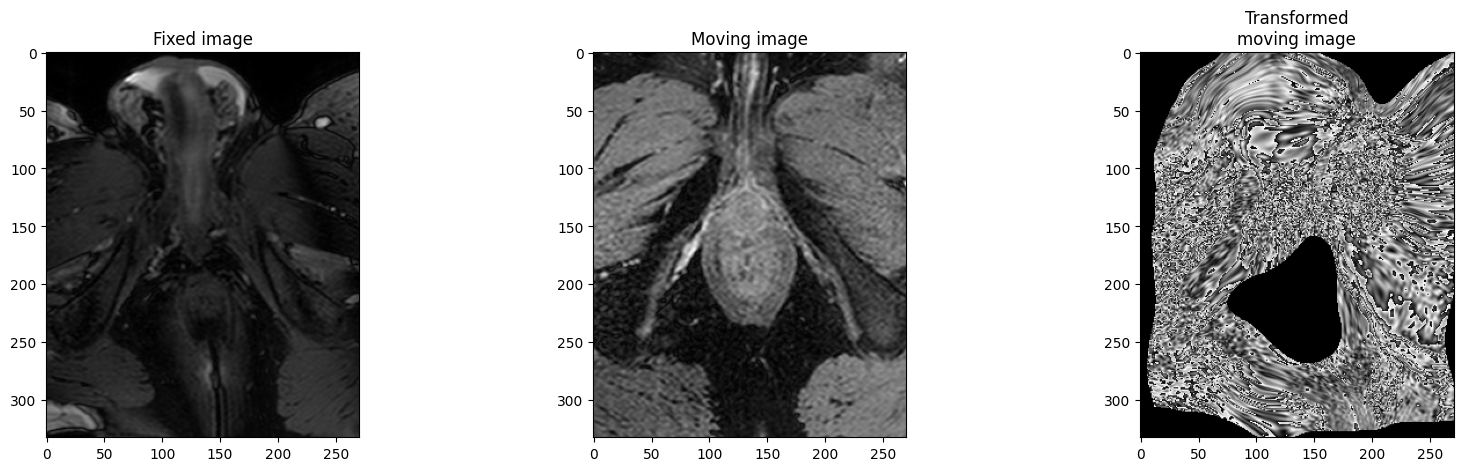

In [14]:
result_path_experiment = os.path.join(output_file_path_experiment, 'result.0.tiff')

transformed_moving_image = imageio.imread(result_path_experiment)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(image_array_fixed[10,:,:], cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(image_array_moving[10,:,:], cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image[10,:,:], cmap='gray')
ax[2].set_title('Transformed\nmoving image')

plt.show()